**Name:** Muluwork Geremew 

**Course:** Advanced Big Data and Data Mining  
**Lab Assignment:** Clustering Analysis Using K-Means and K-Medoids Algorithms Lab 3


In [ ]:
%pip install matplotlib numpy scipy scikit-learn scikit-image pandas torch torchvision

In [2]:
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

### Step 1: Load and Prepare the Dataset

In [3]:
# %pip install pandas
import pandas as pd


# 1. Create a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [4]:

# 2. Peek at the first few rows
print(df.head())

# 3. Check data types & non-null counts
print(df.info())

# 4. Get summary statistics for each feature
print(df.describe())

# 5. Look at class distribution
print(df['target'].value_counts())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [5]:
from sklearn.model_selection import train_test_split
X, y = wine.data, wine.target

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler() # StandardScaler standardizes features by removing the mean and scaling to unit variance

# Fit to the feature data and transform
X_scaled = scaler.fit_transform(df) # This will standardize all features in the DataFrame
# Note: The target variable is not included in the scaling process
# The StandardScaler will standardize the features to have a mean of 0 and a standard deviation of 1.

# Convert back to a DataFrame for convenience
df_scaled = pd.DataFrame(X_scaled, columns=df.columns) 

# Display the first few rows of the standardized data
print(df_scaled.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline    target  
0         0.251717  0.362177                      1.847920  1.013009 -1.213944  
1       

### Step 2: Implement K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add labels to the standardized DataFrame
df_scaled['kmeans_labels'] = labels

# Display the distribution of cluster labels and first few rows
print("Cluster label distribution:")
display(df_scaled['kmeans_labels'].value_counts())

print("\nFirst 5 rows with K-Means labels:")
display(df_scaled.head())

Cluster label distribution:


kmeans_labels
0    65
2    62
1    51
Name: count, dtype: int64


First 5 rows with K-Means labels:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kmedoids_labels,kmeans_labels
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0,2


In [18]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
true_labels = wine.target

# Calculate c using cluster labels
sil_score = silhouette_score(X_scaled, df_scaled['kmeans_labels']) # Silhouette score measures how similar an object is to its own cluster compared to other clusters
# It ranges from -1 to 1, where a higher value indicates better-defined clusters.


# Calculate Adjusted Rand Index comparing true labels and cluster labels
ari_score = adjusted_rand_score(true_labels, df_scaled['kmeans_labels']) # Adjusted Rand Index (ARI) is a measure of the similarity between two data clusterings.
# It adjusts the Rand Index to account for chance, providing a more accurate measure of clustering quality.
# It ranges from -1 to 1, where 1 indicates perfect agreement between the two clusterings.

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Adjusted Rand Index: {ari_score:.4f}")

Silhouette Score: 0.2849
Adjusted Rand Index: 0.8975


### Step 3: Implement K-Medoids Clustering 


In [21]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload and prepare the dataset in case X_scaled is not in memory
data = load_wine()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)
true_labels = data.target
df_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

# K-Medoids implementation
def k_medoids(X, k, max_iter=300, random_state=42):
    np.random.seed(random_state)
    m = X.shape[0]
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]
    
    for _ in range(max_iter):
        distances = pairwise_distances(X, medoids)
        labels = np.argmin(distances, axis=1)
        new_medoid_indices = medoid_indices.copy()
        
        for cluster_id in range(k):
            cluster_points = X[labels == cluster_id]
            if len(cluster_points) == 0:
                continue
            intra_dist = pairwise_distances(cluster_points, cluster_points)
            total_dist = intra_dist.sum(axis=1)
            min_idx = np.argmin(total_dist)
            point_index = np.where(labels == cluster_id)[0][min_idx]
            new_medoid_indices[cluster_id] = point_index
        
        if np.array_equal(new_medoid_indices, medoid_indices):
            break
        medoid_indices = new_medoid_indices
        medoids = X[medoid_indices]
    
    final_distances = pairwise_distances(X, medoids)
    final_labels = np.argmin(final_distances, axis=1)
    return final_labels, medoid_indices

# Run K-Medoids
labels_medoids, medoids_idx = k_medoids(X_scaled, k=3)

# Add labels to DataFrame
df_scaled['kmedoids_labels'] = labels_medoids

# Calculate metrics
sil_medoids = silhouette_score(X_scaled, labels_medoids)
ari_medoids = adjusted_rand_score(true_labels, labels_medoids)

print(f"Silhouette Score (K-Medoids): {sil_medoids:.4f}")
print(f"Adjusted Rand Index (K-Medoids): {ari_medoids:.4f}")


Silhouette Score (K-Medoids): 0.1548
Adjusted Rand Index (K-Medoids): 0.3413


### Step 4: Visualize and Compare Results 

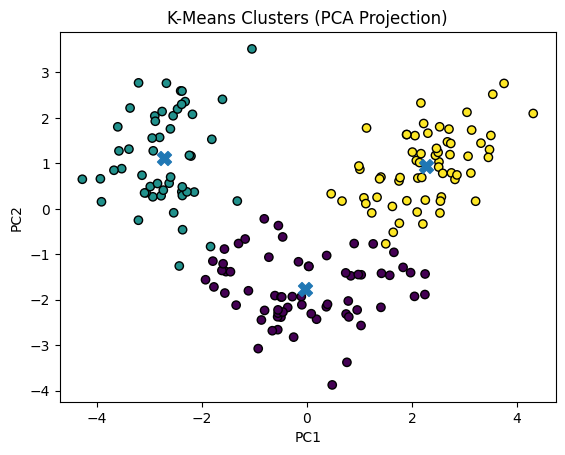

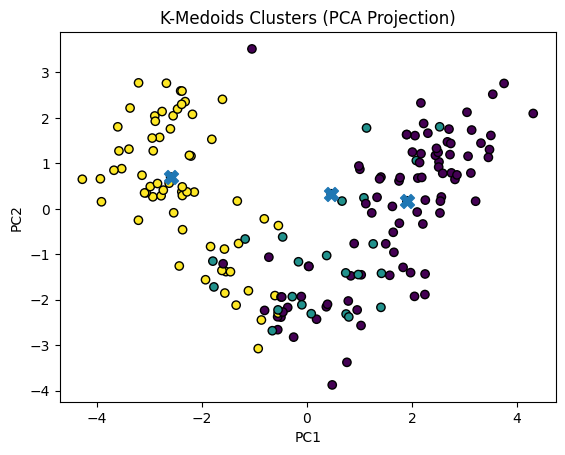

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Load and standardize the Wine dataset
data = load_wine()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans_labels = kmeans.fit_predict(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Run K-Medoids and project medoids to PCA space

medoids_pca = X_pca[medoids_idx]

# Plot K-Means clusters
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, edgecolor='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=100)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot K-Medoids clusters
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_medoids, edgecolor='k')
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], marker='X', s=100)
plt.title("K-Medoids Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()


**Which algorithm produced better-defined clusters?**

K-Means clearly outperformed K-Medoids on this dataset, yielding a higher Silhouette Score (**0.2849** vs. **0.1548**) and a much stronger ARI (**0.8975** vs. **0.3413**). Its clusters are tighter and more separable in PCA space.

---

**Differences in cluster shapes & positioning**

- **K-Means:** Forms roughly spherical, evenly sized clusters. Centroids (the “X” markers) sit at the heart of each point cloud.
- **K-Medoids:** Produces irregularly shaped, elongated clusters with greater overlap. Medoids (actual data points) can lie toward a cluster’s edge, so clusters aren’t balanced around their center.

---

**When to prefer K-Means vs. K-Medoids**

**K-Means is ideal when:**
- Clusters are approximately spherical in Euclidean space.
- You need speed and scalability on large datasets.
- You don’t require cluster centers to be real observations.

**K-Medoids is preferable when:**
- You want robustness to outliers (medoids resist being pulled by extremes).
- You need interpretable representatives (actual data points) per cluster.
- You are working with non-Euclidean or custom distance metrics.
